#📌 Extracción

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)

data = response.json()
print(data)

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

#🔧 Transformación

In [127]:
# Crear DataFrame desde JSON
df_expanded = pd.DataFrame(data).fillna(0.0)

# Columnas que contienen diccionarios
nested_cols = ['customer', 'phone', 'internet', 'account']

# Normalizar y renombrar automáticamente las columnas
for col in nested_cols:
    normalized = pd.json_normalize(df_expanded[col])
    normalized = normalized.add_prefix(f"{col}_")
    df_expanded = pd.concat([df_expanded.drop(columns=[col]), normalized], axis=1)

df_expanded['Churn'] = df_expanded['Churn'].map({'No': 0, 'Yes': 1})

num_cols = df_expanded.select_dtypes(include=['float64', 'int64']).columns
df_expanded[num_cols] = df_expanded[num_cols].fillna(0.0)

cat_cols = df_expanded.select_dtypes(include=['object', 'category']).columns
df_expanded[cat_cols] = df_expanded[cat_cols].fillna('Unknown')

bin_cols = [col for col in df_expanded.columns if set(df_expanded[col].dropna().unique()).issubset({0,1})]
df_expanded[bin_cols] = df_expanded[bin_cols].fillna(0)
df_expanded['customer_Partner'] = df_expanded['customer_Partner'].map({'No': 0, 'Yes': 1})
df_expanded['customer_Dependents'] = df_expanded['customer_Dependents'].map({'No': 0, 'Yes': 1})
df_expanded['phone_PhoneService'] = df_expanded['phone_PhoneService'].map({'No': 0, 'Yes': 1})

df_expanded['account_Charges.Total'] = pd.to_numeric(
    df_expanded['account_Charges.Total'], errors='coerce'
)

# Revisar si hay valores faltantes después de la conversión
df_expanded['account_Charges.Total'].isna().sum()

df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [128]:
df_expanded.head(5)

customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO    0.0          Female                       0   
1  0003-MKNFE    0.0            Male                       0   
2  0004-TLHLJ    1.0            Male                       0   
3  0011-IGKFF    1.0            Male                       1   
4  0013-EXCHZ    1.0          Female                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                  No                      DSL  ...                   Yes   
1                 Yes                      DSL  ...                    No   
2                  No              Fiber optic  ...                    No   
3                  No              Fiber optic  ...                   Yes   
4                  No              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

In [129]:
df_expanded['account_Charges.Monthly'].value_counts()


account_Charges.Monthly
20.05    65
19.90    46
19.85    46
19.55    45
19.70    45
         ..
87.90     1
87.60     1
52.20     1
68.30     1
66.60     1
Name: count, Length: 1585, dtype: int64

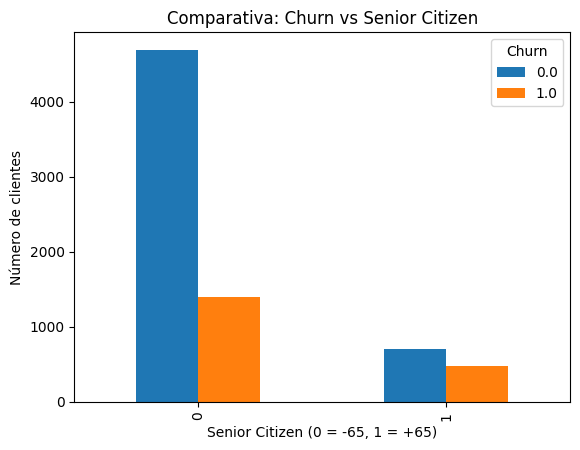

In [130]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('customer_SeniorCitizen')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar")
plt.xlabel("Senior Citizen (0 = -65, 1 = +65)")
plt.ylabel("Número de clientes")
plt.title("Comparativa: Churn vs Senior Citizen")
plt.show()



#📊 Carga y análisis

In [131]:
df_expanded['Churn'].value_counts(normalize=True) * 100


Churn
0.0    74.280996
1.0    25.719004
Name: proportion, dtype: float64

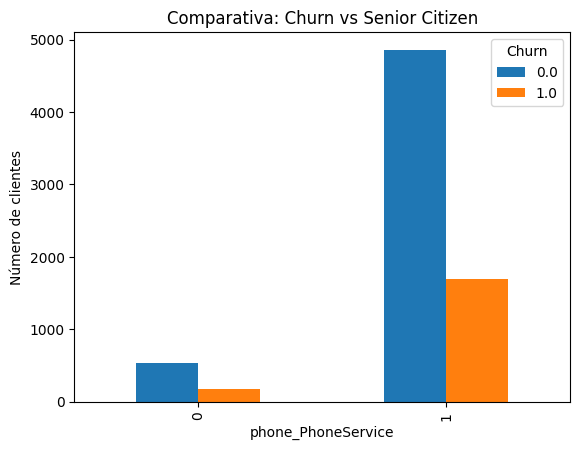

In [132]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('phone_PhoneService')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar")
plt.ylabel("Número de clientes")
plt.title("Comparativa: Churn vs Senior Citizen")
plt.show()



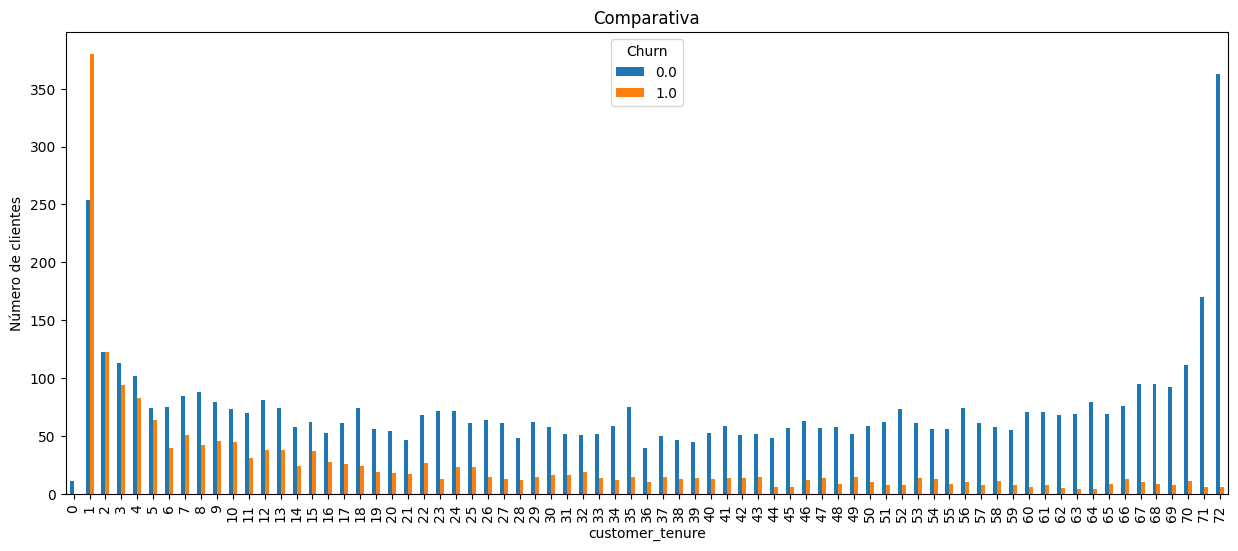

In [133]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('customer_tenure')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar", figsize=(15, 6))
plt.ylabel("Número de clientes")
plt.title("Comparativa")
plt.show()


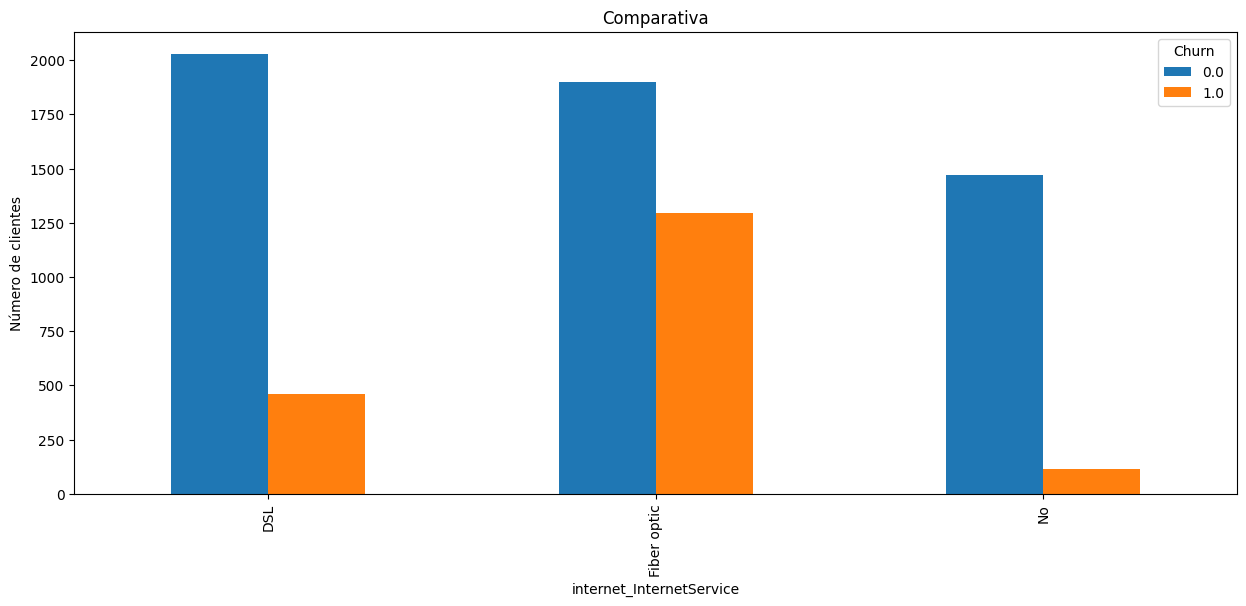

In [134]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('internet_InternetService')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar", figsize=(15, 6))
plt.ylabel("Número de clientes")
plt.title("Comparativa")
plt.show()


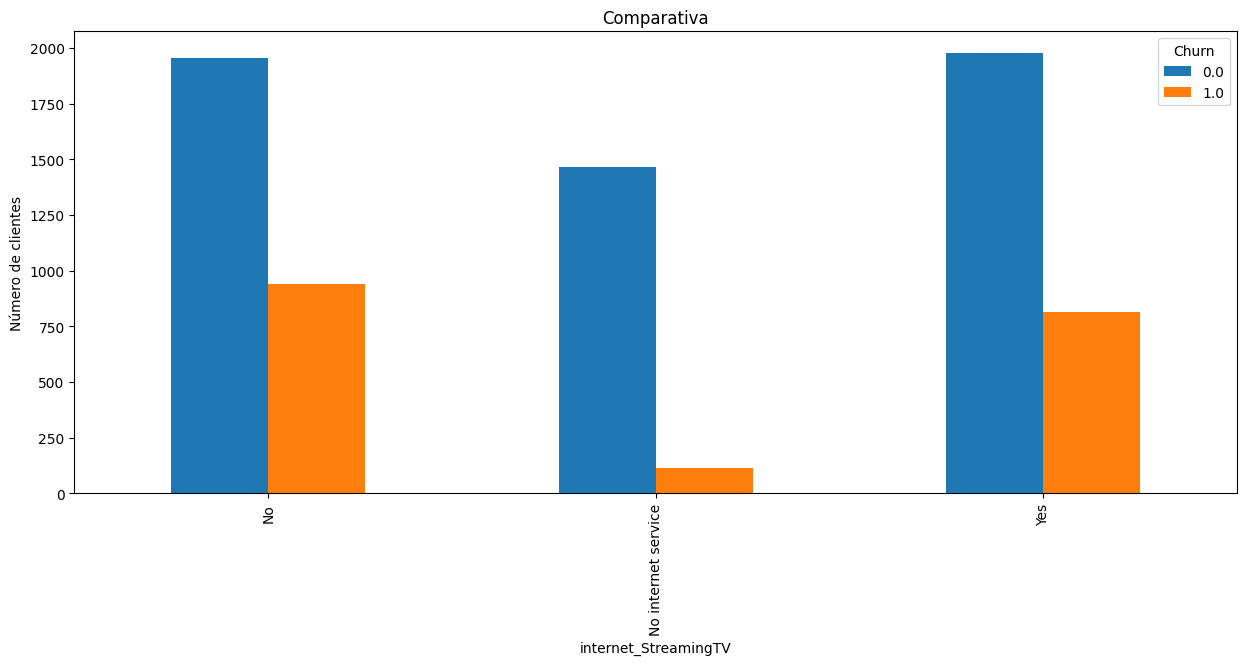

In [135]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('internet_StreamingTV')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar", figsize=(15, 6))
plt.ylabel("Número de clientes")
plt.title("Comparativa")
plt.show()


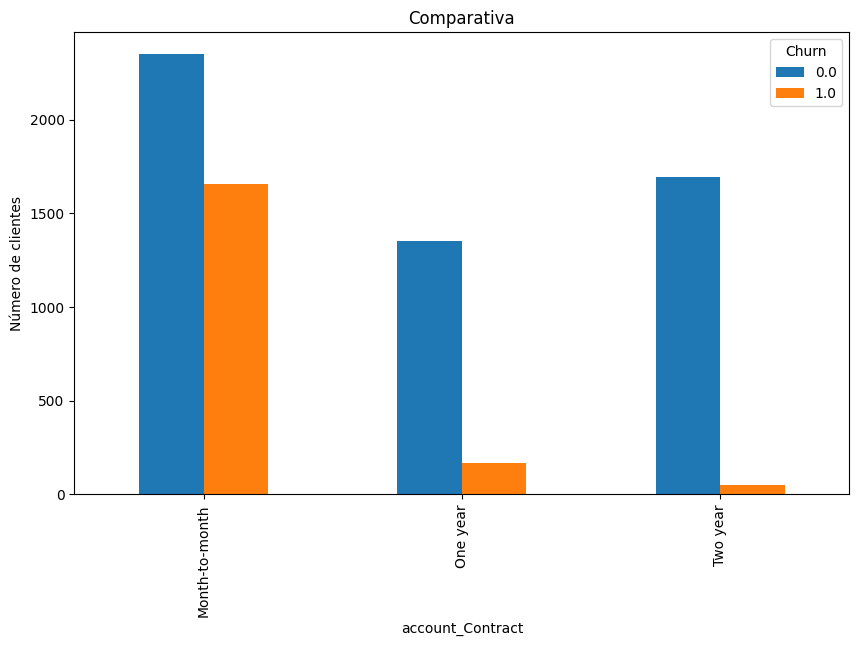

In [136]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('account_Contract')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Número de clientes")
plt.title("Comparativa")
plt.show()


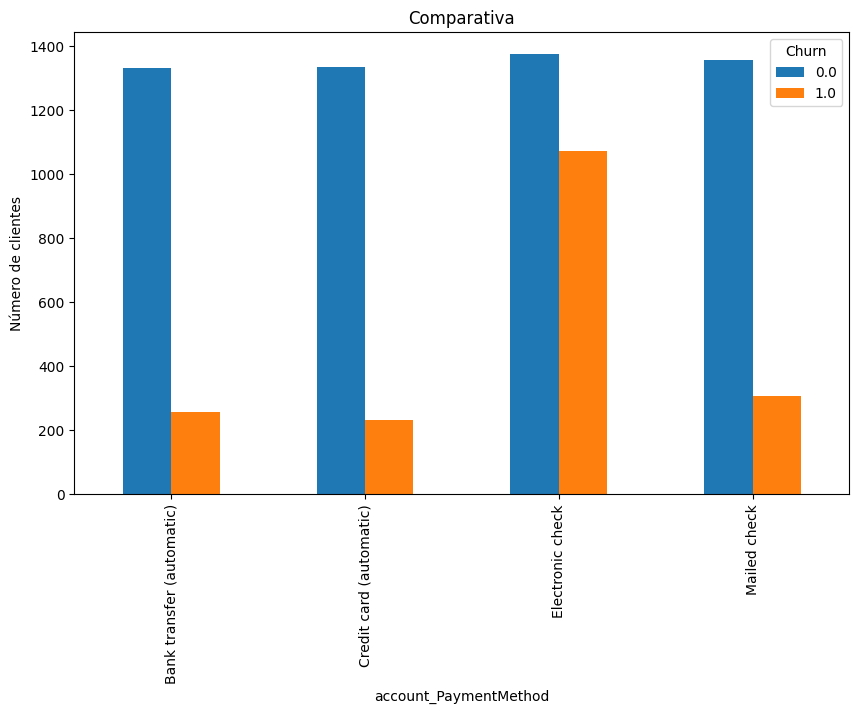

In [137]:
# Agrupamos por SeniorCitizen y Churn
churn_senior = df_expanded.groupby('account_PaymentMethod')['Churn'].value_counts().unstack()

# Gráfico de barras
churn_senior.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Número de clientes")
plt.title("Comparativa")
plt.show()

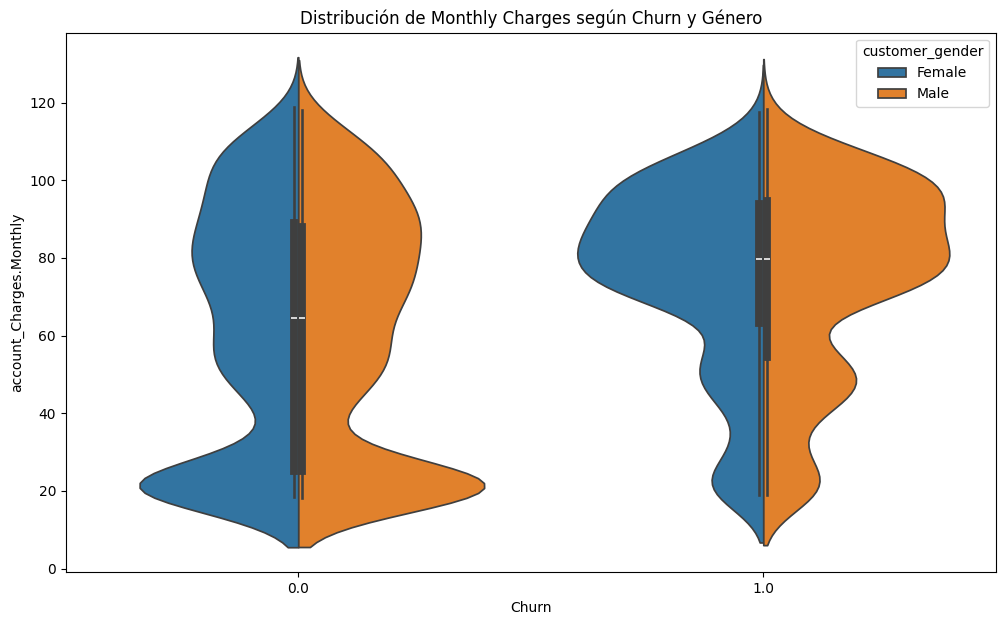

In [138]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.violinplot(
    x='Churn',
    y='account_Charges.Monthly',
    hue='customer_gender',
    data=df_expanded,
    split=True
)
plt.title("Distribución de Monthly Charges según Churn y Género")
plt.show()


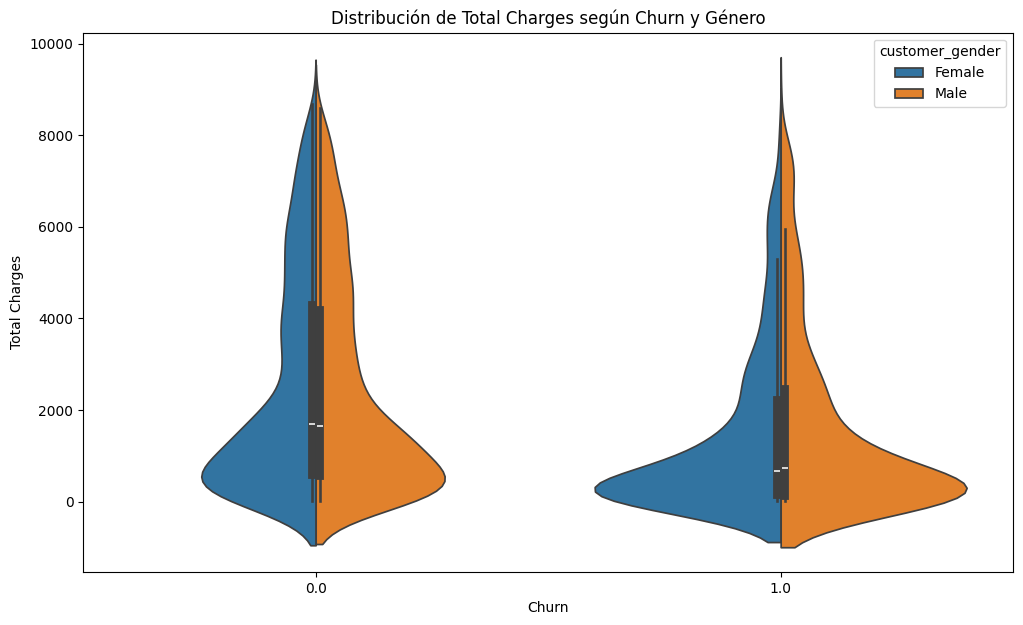

In [139]:
plt.figure(figsize=(12,7))
sns.violinplot(
    x='Churn',
    y='account_Charges.Total',
    hue='customer_gender',
    data=df_expanded,
    split=True
)
plt.title("Distribución de Total Charges según Churn y Género")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()


In [140]:
df_expanded2 = df_expanded.copy()

# Columnas de interés
columnas_interes = [
    "Churn",
    "customer_SeniorCitizen",
    "customer_tenure",
    "account_Contract",
    "account_Charges.Monthly",
    "account_Charges.Total",
    "customer_gender"
]

# Verificamos si todas las columnas existen en el DataFrame
for col in columnas_interes:
    if col not in df_expanded2.columns:
        print(f"¡Atención! La columna '{col}' no existe en el DataFrame.")

# Seleccionamos solo las columnas que existen
columnas_validas = [col for col in columnas_interes if col in df_expanded2.columns]
nuevo_df = df_expanded2[columnas_validas]

# Revisamos las primeras filas del nuevo DataFrame
print(nuevo_df.head())

# Guardamos el nuevo DataFrame en un archivo CSV
nuevo_df.to_csv("telecomx_clientes_filtrado.csv", index=False)

print("Archivo CSV creado exitosamente: telecomx_clientes_filtrado.csv")


   Churn  customer_SeniorCitizen  customer_tenure account_Contract  \
0    0.0                       0                9         One year   
1    0.0                       0                9   Month-to-month   
2    1.0                       0                4   Month-to-month   
3    1.0                       1               13   Month-to-month   
4    1.0                       1                3   Month-to-month   

   account_Charges.Monthly  account_Charges.Total customer_gender  
0                     65.6                 593.30          Female  
1                     59.9                 542.40            Male  
2                     73.9                 280.85            Male  
3                     98.0                1237.85            Male  
4                     83.9                 267.40          Female  
Archivo CSV creado exitosamente: telecomx_clientes_filtrado.csv


#📄Informe final

# Informe Final: Análisis de Churn de Clientes – Telecom X

**Proyecto:** Churn de Clientes  
**Responsable:** Erick Gonzalez Flores – Asistente de Análisis de Datos  

---

## 1. Introducción

Telecom X enfrenta una alta tasa de cancelaciones de clientes, lo que impacta directamente en sus ingresos y sostenibilidad a largo plazo. El proyecto "Churn de Clientes" tiene como objetivo identificar los factores que contribuyen a la pérdida de clientes y proporcionar información que permita al equipo de Data Science desarrollar modelos predictivos y estrategias efectivas de retención.

El presente informe resume los hallazgos obtenidos a partir del análisis de los datos de clientes, utilizando Python y sus principales bibliotecas de análisis (pandas, numpy, matplotlib y seaborn).

---

## 2. Metodología

1. **Recopilación de Datos:** Se obtuvieron los registros históricos de clientes por medio de API, incluyendo información demográfica, tipo de contrato, duración del servicio y cargos mensuales.  
2. **Procesamiento de Datos:** Se realizó limpieza de datos, manejo de valores faltantes y categorización de variables relevantes para el análisis de churn.  
3. **Análisis Exploratorio:** Se realizaron gráficos y estadísticas descriptivas para identificar patrones de cancelación y características de los clientes que se van.  

---

## 3. Principales Hallazgos

A partir del análisis de los datos, se destacan las siguientes observaciones:

- **Tiempo de Permanencia de los Clientes (Tenure):**
  - La mayoría de los usuarios que abandonan el servicio lo hacen dentro de los primeros 24 meses de suscripción.
  - El **primer mes** registra la mayor cantidad de cancelaciones, indicando que la retención temprana es crítica.

- **Perfil Demográfico:**
  - Los **adultos mayores (65+) presentan mayor probabilidad de churn**, a diferencia de los clientes más jóvenes, que muestran mayor permanencia.

- **Cargos Mensuales:**
  - Los usuarios que cancelan sus servicios tienden a tener cargos mensuales que oscilan entre **60 y 100 dólares**.

- **Tipo de Contrato:**
  - La mayor parte de los clientes que se van tienen contratos **mes a mes**, lo que indica que la falta de compromiso a largo plazo está estrechamente vinculada a la tasa de cancelación.

---

## 4. Conclusiones

El análisis sugiere que la pérdida de clientes está concentrada principalmente en los primeros meses de suscripción, y que ciertos perfiles de usuarios —adultos mayores, clientes con cargos elevados y contratos mes a mes— tienen mayor probabilidad de churn.  

Estos hallazgos proporcionan información valiosa para el equipo de Data Science, que podrá:

- Desarrollar modelos predictivos de churn enfocados en los **primeros 24 meses de servicio**.  
- Implementar estrategias de retención temprana, como incentivos para nuevos clientes y mejoras en la experiencia inicial.  
- Ofrecer beneficios diferenciados a clientes adultos mayores, que representan un grupo con alto riesgo de abandono.  
- Evaluar ajustes en los contratos mes a mes para fomentar mayor compromiso y permanencia.  

---

## 5. Recomendaciones

1. Implementar un programa de **retención temprana** para clientes nuevos, especialmente durante el primer mes.  
2. Ofrecer **beneficios o descuentos** a clientes con contratos mes a mes para incentivar compromisos más largos.  
3. Diseñar **planes y paquetes específicos para adultos mayores**, reduciendo su propensión a cancelar.  
4. Monitorear y analizar continuamente los **rangos de cargos** para identificar patrones de insatisfacción relacionados con el precio.  
5. Complementar el análisis con modelos predictivos más avanzados (Random Forest, Regresión Logística, XGBoost) que permitan segmentar clientes en riesgo con mayor precisión.  

---
